## TOC:
* [Unzip data](#first-bullet)
* [Second Bullet Header](#second-bullet)

## Unzip data <a class="anchor" id="first-bullet"></a>

In [2]:
import zipfile
import os
import numpy as np
import re

def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)


path='/hdd/Sentinel_1/Delaware/WV/'
zipList= natural_sort([file for file in os.listdir(path) if file.endswith('.zip')])
print(np.array(zipList).T)

for file in zipList:   # get the list of files # if it is a zipfile, extract it
    print("Doing ",file)
    with zipfile.ZipFile(path+file) as item: # treat the file as a zip
        item.extractall(path+'SAFE/')  # extract it in the working directory

print('Ended')
#safeList= natural_sort([file for file in os.listdir('') if file.endswith('.SAFE')])

#for file in safeList:   # get the list of files # if it is a zipfile, extract it
 #   with safeList as item: # treat the file as a zip
        #   slcList= safeList + '/measurements/'+ # extract it in the working directory
            
#print(zipList)
#path_to_extract_to='DATASET_NATHAN/EXTRACTED/'
#with zipfile.ZipFile(path, 'r') as zip_ref:
#    zip_ref.extractall(directory_to_extract_to)

  
    

['S1B_WV_SLC__1SSV_20210708T224514_20210708T225349_027709_034E8A_C0D8.zip']
Doing  S1B_WV_SLC__1SSV_20210708T224514_20210708T225349_027709_034E8A_C0D8.zip
Ended


In [4]:
import os
import re

def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

safeList= natural_sort([file for file in os.listdir(path+'SAFE/') if file.endswith('.SAFE')])
print(np.array(safeList).T)
slcList=[]

vignette='021'
for file in safeList:   # get the list of files in the folder
    tiffVignette=[tifile for tifile in os.listdir(path+'SAFE/'+file+'/measurement/') if tifile.endswith(vignette +'.tiff')]# get the list of tiff files in the measurement folder
    for slc in tiffVignette:
        slcList.append(str(file) + '/measurement/' + str(slc))

print(np.array(slcList).T)
print('Ended')

['S1B_WV_SLC__1SSV_20210708T224514_20210708T225349_027709_034E8A_C0D8.SAFE']
['S1B_WV_SLC__1SSV_20210708T224514_20210708T225349_027709_034E8A_C0D8.SAFE/measurement/s1b-wv1-slc-vv-20210708t225007-20210708t225010-027709-034e8a-021.tiff']
Ended


SLC number 0
S1B_WV_SLC__1SSV_20210708T224514_20210708T225349_027709_034E8A_C0D8.SAFE/measurement/s1b-wv1-slc-vv-20210708t225007-20210708t225010-027709-034e8a-021.tiff
S1B_WV_SLC__1SSV_20210708T224514_20210708T225349_027709_034E8A_C0D8.SAFE/annotation/calibration/calibration-s1b-wv1-slc-vv-20210708t225007-20210708t225010-027709-034e8a-021.xml
/hdd/Sentinel_1/Delaware/SAFE/S1B_WV_SLC__1SSV_20210708T224514_20210708T225349_027709_034E8A_C0D8.SAFE/measurement/s1b-wv1-slc-vv-20210708t225007-20210708t225010-027709-034e8a-021.tiff
5631
4921
(5, 142)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
1590.8408


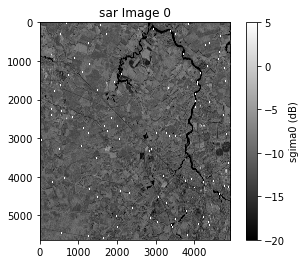

Ended


In [7]:
import xml.etree.ElementTree as etree
import numpy as np
import rasterio
from rasterio.enums import Resampling
import numpy as np
from natsort import natsorted
import imageio
from PIL import Image
import matplotlib.pyplot as plt
import os
import scipy.io
import copy
from pathlib import Path
    
# ##########################################################   OPEN SLC + SET XML NAME  ##############################################################################

# set folder where slc + calib xml are preset
#slcList= [file for file in os.listdir('WV/') if file.endswith('.tiff')]
#print(np.array(slcList).T)
#print(len(slcList))
#dvjgv ;
slcList=natsorted(slcList)
#calibList=[file for file in os.listdir('WV/') if file.endswith('.xml')]
calibList=copy.deepcopy(slcList);
for n in range(0,len(slcList)):
    calibList[n]='calibration-'+slcList[n]
    calibList[n]=slcList[n].replace('measurement/','annotation/calibration/calibration-')
    calibList[n]=calibList[n].replace('.tiff','.xml')
    print('SLC number '+str(n))
    print(slcList[n])
    print(calibList[n])
    fp1 = path+'SAFE/' + slcList[n]
    print(fp1)
    img1 = rasterio.open(fp1)
    sarImage=(img1.read(1)).T

    RasterWidth=img1.width
    RasterHeight=img1.height
    print(RasterWidth)
    print(RasterHeight)
    
    ########################################################### OPEN XML AND GET CALIBRATION VECTOR AND ASSOCIATED PIXEL POSITIONS ########################
    with open(path+'SAFE/'+calibList[n], 'r') as xml_file:
        xml_tree = etree.parse(xml_file)
    root=xml_tree.getroot()
    #print(root.tag)
    PixelArray=[]

    # READ Pixel 
    for child in root.findall('calibrationVectorList'):
        for calibVec in child.findall('calibrationVector'):
            for pixel in (calibVec.findall('pixel')):
                (PixelArray.append((pixel.text).split()))
    PixelArray=np.array(PixelArray)        
    print(PixelArray.shape)               
    print(type(PixelArray[0]))
    sigmaNoughtArray=[]


    # READ sigmaNought
    for child in root.findall('calibrationVectorList'):
        for calibVec in child.findall('calibrationVector'):
            for pixel in (calibVec.findall('sigmaNought')):
                (sigmaNoughtArray.append(((pixel.text).split())))

    sigmaNoughtArray=np.float32(np.array(sigmaNoughtArray))                
    print(type(sigmaNoughtArray))
    #new_dataset.write(sigmaNoughtArray, 1)

    ############################################################ SAVE CALIB ARRAYS AS TIF (check and further processing) ############################################


    upscale_factorx=(RasterWidth)/(sigmaNoughtArray.shape[0]) # scaling in x (targetNumberPixel/LowResPixel)
    upscale_factory=(RasterHeight)/(sigmaNoughtArray.shape[1])  # scaling in y (targetNumberPixel/LowResPixel)

    Path(path+"SigmaNought").mkdir(parents=True, exist_ok=True)
    imageio.imwrite(path+'SigmaNought/sigmaNoughtArray_' + str (n) +'.tif', sigmaNoughtArray)

    ############################################################ RESAMPLE ######################################################################################

    #with rasterio.open("WV/sigmaNoughtArray.tiff") as dataset:
    with rasterio.open(path+'SigmaNought/sigmaNoughtArray_' + str (n) +'.tif') as dataset:


        # resample data to target shape
        data = dataset.read(
            out_shape=(
                dataset.count,
                int(dataset.height * upscale_factorx),
                int(dataset.width * upscale_factory)
            ),
            resampling=Resampling.bilinear
        )

        # scale image transform
        transform = dataset.transform * dataset.transform.scale(
            (dataset.width / data.shape[-1]),
            (dataset.height / data.shape[-2])
        )

    sigmaNoughtArrayResampled=(data)
    #print(data)
    #print(sigmaNoughtArrayResampled)

    lut_calibration=sigmaNoughtArrayResampled[0,:,:]
    #sarImage=(img1.read(1)).T
    np.argwhere(np.isnan(sarImage))
    ############################################################ CALIBRATE AND SAVE ######################################################################################
    
    
    Path(path+"Result").mkdir(parents=True, exist_ok=True)
    print((lut_calibration[100][100]))
    sarImage[abs(sarImage)==0]='nan'
    sigma0=np.abs(sarImage)/lut_calibration
    #imageio.imwrite('WV/sigma0_' + str (n) +'.tif', sigma0)
    #imageio.imwrite('WV/sarImage_' + str (n) +'.tif', sarImage)
    mdic = {"sarImage": sarImage}
    scipy.io.savemat(path+'Result/sarImage_' + str(n) + '.mat', mdic)
    mdic = {"sigma0": sigma0}
    scipy.io.savemat(path+'Result/sigma0_' + str(n) + '.mat', mdic)
    fig = plt.figure()
    plt.imshow((20*np.log10(sigma0)), cmap='gray')
    cbar=plt.colorbar()
    cbar.set_label('sgima0 (dB)')
    plt.title('sar Image ' + str(n))
    plt.clim(-20,5)
    plt.show()
  


print('Ended')

In [35]:
#Useless

plt.rcParams['figure.dpi'] = 200
# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

cropx=np.arange(150,300)
cropy=np.arange(1800,1900)

fig = plt.figure()
plt.imshow((20*np.log10(sigma0)), cmap='gray')
cbar=plt.colorbar()
cbar.set_label('sgima0 (dB)')
plt.title('WV 29/07/2021')
plt.clim(-20,5)
plt.show()

fig = plt.figure()
plt.imshow((10*np.log10((abs(lut_calibration)))))
cbar=plt.colorbar()
cbar.set_label('SigmaNought (dB)')
plt.title('WV 29/07/2021')
#plt.clim(5,40)
plt.show()

fig = plt.figure()
plt.imshow((((np.abs(sarImage[1680:1700,4560:4600])))), cmap='gray')
cbar=plt.colorbar()
cbar.set_label('DN (dB)')
plt.title('WV 29/07/2021')
#plt.clim(5,40)
plt.show()
print(np.abs(sarImage[1685:1689,4580:4585]))


RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 1200x800 with 2 Axes>

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 1200x800 with 2 Axes>

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 1200x800 with 2 Axes>

[[352.966    128.73616  439.2323   449.69434  413.8176  ]
 [106.       137.64084  158.02847  426.01877  224.08258 ]
 [239.20076  290.4135   226.56566   44.407207 582.41736 ]
 [521.5515   752.9283   970.1835   527.0541   776.03156 ]]


In [36]:
plt.rcParams['figure.dpi'] = 200
# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig = plt.figure()

plt.imshow(np.fliplr(10*np.log10((abs(img1.read(1))))))
cbar=plt.colorbar()
cbar.set_label('DN (dB)')
plt.title('WV 29/07/2021')
plt.clim(5,40)
plt.show()

fig = plt.figure()

plt.imshow(np.fliplr(10*np.log10((abs(img2.read(1))))))
cbar=plt.colorbar()
cbar.set_label('DN (dB)')
plt.title('WV 10/08/2021')
plt.clim(5,40)
plt.show()

plt.figure()
plt.imshow(abs(coh))
plt.colorbar()
plt.show()


plt.figure()
plt.imshow(np.angle(coh))
plt.colorbar()
plt.show()

/tmp/ipykernel_49098/654619653.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.fliplr(10*np.log10((abs(img1.read(1))))))


RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 1200x800 with 2 Axes>

NameError: name 'img2' is not defined

<Figure size 1200x800 with 0 Axes>